In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"C:\Users\Raunak Rajput\Desktop\project\Admission_Predict.csv")
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [3]:
dataset.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

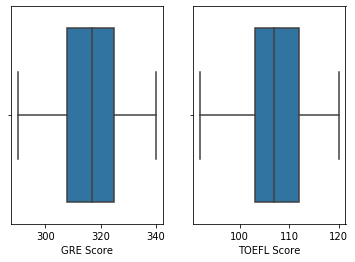

In [4]:
import seaborn as sns
plt.subplot(1,2,1)
sns.boxplot(dataset['GRE Score'])
plt.subplot(1,2,2)
sns.boxplot(dataset['TOEFL Score'])

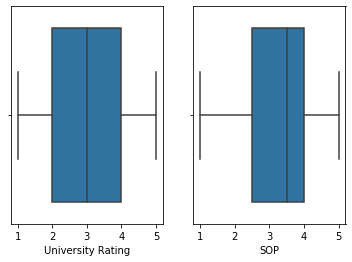

In [5]:
plt.subplot(1,2,1)
sns.boxplot(dataset['University Rating'])
plt.subplot(1,2,2)
sns.boxplot(dataset['SOP'])

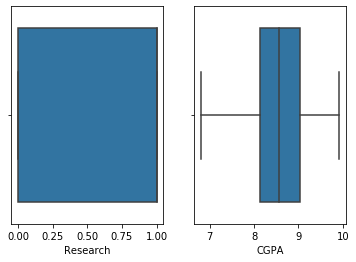

In [6]:
plt.subplot(1,2,1)
sns.boxplot(dataset['Research'])
plt.subplot(1,2,2)
sns.boxplot(dataset['CGPA'])

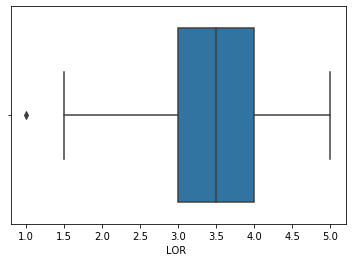

In [7]:
d1 = dataset.iloc[:,5]
sns.boxplot(d1)

In [8]:
q1 = dataset.quantile(0.25)   
q3 = dataset.quantile(0.75)  
IQR = q3-q1
IQR

Serial No.           249.5000
GRE Score             17.0000
TOEFL Score            9.0000
University Rating      2.0000
SOP                    1.5000
LOR                    1.0000
CGPA                   0.9125
Research               1.0000
Chance of Admit        0.1900
dtype: float64

In [9]:
dataset = dataset[~((dataset<(q1-1.5*IQR))|(dataset>(q3 + 1.5*IQR))).any(axis=1)]
dataset

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


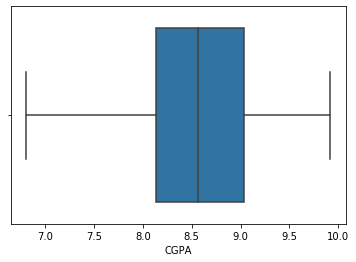

In [10]:
sns.boxplot(dataset['CGPA'])

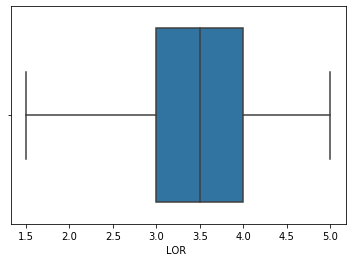

In [11]:
d1 = dataset.iloc[:,5]
sns.boxplot(d1)

In [12]:
x = dataset.iloc[:,1:8].values
y = dataset.iloc[:,-1].values
x

array([[337.  , 118.  ,   4.  , ...,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  , ...,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [330.  , 120.  ,   5.  , ...,   5.  ,   9.56,   1.  ],
       [312.  , 103.  ,   4.  , ...,   5.  ,   8.43,   0.  ],
       [327.  , 113.  ,   4.  , ...,   4.5 ,   9.04,   0.  ]])

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
x_train

array([[ 1.28423373,  1.44948697,  1.64721742, ...,  1.64187086,
         1.32775801,  0.88034084],
       [-1.12094875, -1.2039017 , -0.98515254, ..., -0.53706056,
        -0.60312446, -1.13592367],
       [ 1.7296379 ,  0.7861398 ,  1.64721742, ...,  1.64187086,
         1.96028848,  0.88034084],
       ...,
       [-1.83359541, -1.36973849, -0.98515254, ...,  0.00767229,
        -2.16780509, -1.13592367],
       [ 1.9968804 ,  1.94699735,  1.64721742, ...,  0.55240515,
         1.86041525, -1.13592367],
       [ 0.57158707,  0.95197659,  0.76976077, ...,  1.097138  ,
         1.07807493,  0.88034084]])

In [14]:
from joblib import dump
dump(sc,'transform.save')

['transform.save']

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [16]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
dump(lr,'multi.save')

['multi.save']

In [18]:
lr.predict(sc.transform([[310,110,4.6,4.5,4.5,9.5,1]]))

array([0.86282334])

In [19]:
y_pred = lr.predict(x_test)
y_pred

array([0.66331482, 0.69234209, 0.95367775, 0.94406905, 0.93699046,
       0.64686495, 0.54717695, 0.69116544, 0.56383363, 0.76497947,
       0.77436237, 0.72323336, 0.89279683, 0.55306722, 0.8504715 ,
       0.78774565, 0.82328961, 0.63980272, 0.70142865, 0.5227887 ,
       0.59543417, 0.72587134, 0.61304477, 0.70693756, 0.83859344,
       0.65469122, 0.69152273, 0.50600114, 0.84363492, 0.88664385,
       0.73479138, 0.78949767, 0.67485369, 0.82352238, 0.55939843,
       0.65087308, 0.79828115, 0.80249755, 0.59444252, 0.52567812,
       0.59401546, 0.89813115, 0.5721261 , 0.77919687, 0.76896928,
       0.81016108, 0.91946197, 0.84159191, 0.62069143, 0.70071856,
       0.63124718, 0.87801383, 0.70806051, 0.72526929, 0.78576467,
       0.85461635, 0.52496976, 0.81217782, 0.55344306, 0.78021241,
       0.50709426, 0.69087423, 0.50828735, 0.7566956 , 0.7092427 ,
       0.63782151, 0.73832897, 0.51322582, 0.46718872, 0.76629307,
       0.98526495, 0.78042306, 0.60185588, 0.64868009, 0.87807

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7365670027220518

In [21]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50,criterion='mse',random_state=0)

In [22]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [23]:
y_pred = rf.predict(x_test)
y_pred

array([0.6746, 0.7054, 0.9306, 0.9342, 0.9354, 0.6726, 0.5814, 0.6478,
       0.5784, 0.7366, 0.7602, 0.7752, 0.8674, 0.572 , 0.8418, 0.7728,
       0.8246, 0.6316, 0.7132, 0.5492, 0.6214, 0.7304, 0.6038, 0.72  ,
       0.8632, 0.6448, 0.6264, 0.524 , 0.7624, 0.8962, 0.7152, 0.8112,
       0.7026, 0.8134, 0.6066, 0.5898, 0.775 , 0.8176, 0.6366, 0.528 ,
       0.6162, 0.9076, 0.5342, 0.7304, 0.7596, 0.7996, 0.9188, 0.839 ,
       0.558 , 0.6906, 0.6858, 0.874 , 0.7128, 0.7268, 0.7374, 0.8436,
       0.5472, 0.8266, 0.6276, 0.7532, 0.461 , 0.6702, 0.5108, 0.7538,
       0.7296, 0.6702, 0.7328, 0.4698, 0.4558, 0.7236, 0.9674, 0.7716,
       0.6104, 0.6448, 0.851 , 0.9262, 0.7232, 0.6618, 0.5574, 0.7088,
       0.722 , 0.85  , 0.6624, 0.7244, 0.552 , 0.5378, 0.8084, 0.6064,
       0.4828, 0.6762, 0.7   , 0.894 , 0.7802, 0.639 , 0.6378, 0.879 ,
       0.5728, 0.7642, 0.6508, 0.652 ])

In [24]:
r2_score(y_test,y_pred)

0.700914588183657